In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize
from skimage.io import imread,imsave

In [2]:
!ls ../private_data/

EQE_Azur_3C44.csv
Illumination profile_20180926.csv
Illumination profile_20180926.png
Illumination profile_20180926_random.csv
Illumination_profile_20181016.png
Mask_profile_20181016.png
azure_3c44_top.csv
demo_eqe.xlsx
export_rays_binary_1mm.1.ray
quasi_3D_solver.py
test_full_dynamic_pixel.py
test_mj_3d.py


In [3]:
mask_profile_file="../private_data/Mask_profile_20181016.png"

In [4]:
mask_image=imread(mask_profile_file,as_gray=True)

In [5]:
mask_image.shape

(1000, 1000)

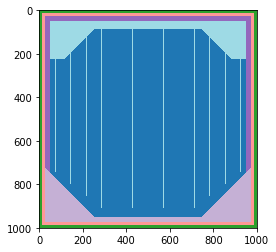

In [6]:
plt.imshow(mask_image,cmap="tab20")
plt.show()

## Show the color map

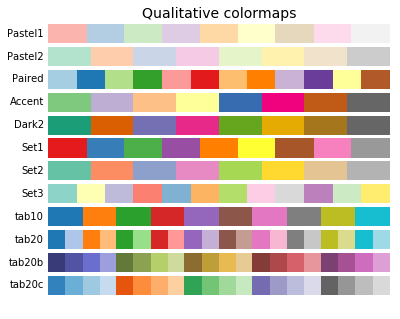

In [7]:
cmaps={}
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

## Make mask for two-sided contact

In [8]:
two_sided_mask_image=np.copy(mask_image)

In [9]:
mask_image.shape

(1000, 1000)

In [10]:
mask_image.max()

1.0

In [11]:
two_sided_mask_image=two_sided_mask_image*255
two_sided_mask_image=two_sided_mask_image.astype(np.uint8)

In [12]:
two_sided_mask_image.max()

255

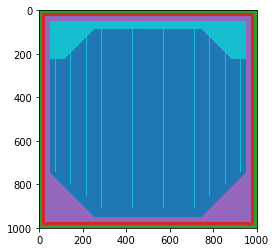

In [13]:
plt.imshow(two_sided_mask_image,cmap="tab10")

In [14]:
np.unique(two_sided_mask_image.ravel())

array([  0,  60,  99, 110, 120, 255], dtype=uint8)

In [15]:
two_sided_mask_image[two_sided_mask_image==120]=255

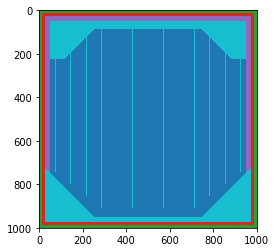

In [16]:
plt.imshow(two_sided_mask_image,cmap="tab10")

In [19]:
np.save("../private_data/Mask_profile_20181016.npy",two_sided_mask_image)